In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

# Read data from CSV file
autodata = 'Indian Liver Patient Dataset (ILPD).csv'
# List of columns which contains numeric data
df = pd.read_csv(autodata, sep=',', decimal='.', header=None, names=["Age", "Gender", "TotBili", "DirBili", "Alkline", "Alamine", 
    "Aspartate", "TotProtin", "Albumin", "AGratio", "Disease" ]) 

df.head()

,Age,Gender,TotBili,DirBili,Alkline,Alamine,Aspartate,TotProtin,Albumin,AGratio,Disease
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [7]:
# This will give number of NaN values in every column.
df.isnull().sum(axis = 0)

Age          0
Gender       0
TotBili      0
DirBili      0
Alkline      0
Alamine      0
Aspartate    0
TotProtin    0
Albumin      0
AGratio      4
Disease      0
dtype: int64

In [8]:
#Strip all the white spaces.
def strip_lower(df):
    return df.apply(lambda x: x.strip() if type(x) is str else x)
df = strip_lower(df)


In [9]:
#check the rows of NaN values.
null_columns=df.columns[df.isnull().any()]
print(df[df["AGratio"].isnull()][null_columns])

     AGratio
209      NaN
241      NaN
253      NaN
312      NaN


In [10]:
#Replace NaN values with the mean value as median and mean is almost same
AGarr = df[df["AGratio"] != np.nan]["AGratio"]
df["AGratio"] = df["AGratio"].fillna(AGarr.mean())

In [11]:
#check for duplicate rows
df.loc[df.duplicated(keep=False),:]

,Age,Gender,TotBili,DirBili,Alkline,Alamine,Aspartate,TotProtin,Albumin,AGratio,Disease
18,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
19,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
25,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
26,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
33,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
34,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
54,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
55,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
61,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1
62,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1


In [12]:
#drop the duplicate rows keeping the first occurances intact
df.drop_duplicates(keep='first', inplace=True)

#describe the dataframe for the exploratory analysis.
df.describe()


,Age,TotBili,DirBili,Alkline,Alamine,Aspartate,TotProtin,Albumin,AGratio,Disease
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000
mean,44.849123,3.321754,1.497544,291.750877,79.728070,109.380702,6.496316,3.148947,0.947997,1.287719
std,16.242182,6.267941,2.833231,245.291859,181.471697,290.880671,1.088300,0.796813,0.318510,0.453097
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.947064,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.000000,86.750000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 <a list of 10 Text yticklabel objects>)

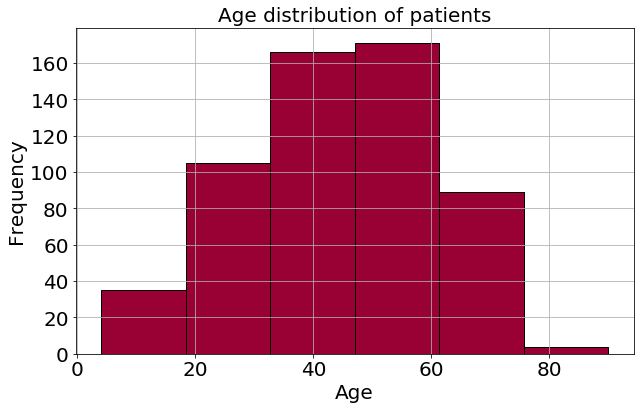

In [13]:
# Task 2
#data exploration
#Age
df[['Age']].hist(figsize=(10,6),bins=6,color='#990033' , edgecolor='black', linewidth=1)
plt.title("Age distribution of patients",size = 20)
plt.ylabel('Frequency',size = 20)
plt.xlabel('Age',size = 20);
plt.xticks(size = 20)
plt.yticks(size = 20)

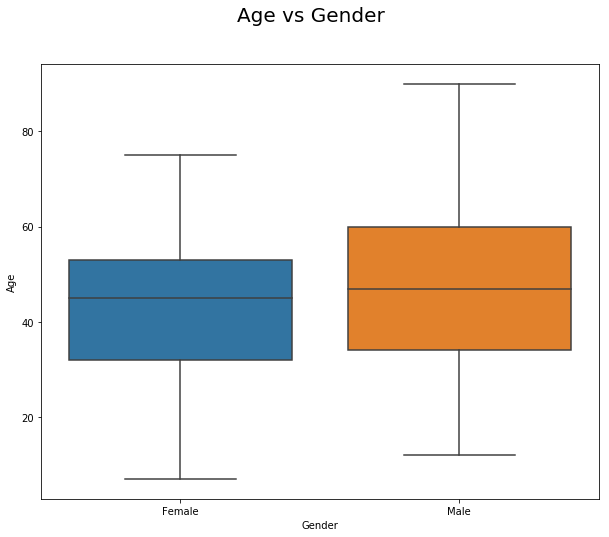

In [19]:
#Gender and Age of the diagnoised patients.
dfs=df.loc[(df['Disease']==1),:]
plt.rcParams['figure.figsize']=(10,8)
fig=plt.figure()
plt.suptitle('Age vs Gender', fontsize=20)
secPlt1 = sns.boxplot(x="Gender", y="Age", data=dfs)

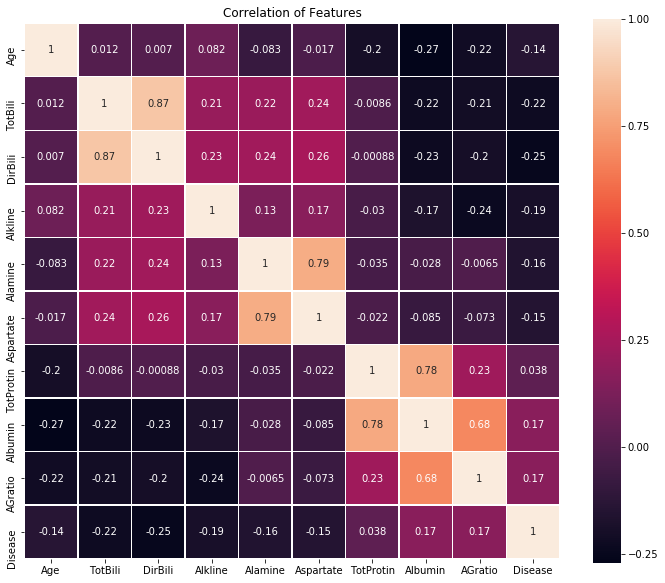

In [15]:
#correlation-matrix
plt.subplots(figsize=(12, 10))
plt.title('Correlation of Features')
# Draw the heatmap using seaborn
sns.heatmap(df.corr(),linewidths=0.5, vmax=1.0, square=True,annot=True)
plt.savefig('fig2')
plt.show()

In [28]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

#Assigning the test and target attributes.
X = df.iloc[:, :-1].values
y = df.iloc[:, 10].values
#Encoding Categorical Data using LabelEncoder
X[:,1] = labelencoder_X.fit_transform(X[:,1])

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state=8)


#Define a function to print Pricision, Recall, F1-Score.
def print_metrics(y_true,y_pred):
    print("\n precision: "+str(precision_score(y_true, y_pred, average='macro')))
    print("\n recall: "+str(recall_score(y_true, y_pred, average='macro')))
    print("\n f1 score: "+str(f1_score(y_true, y_pred, average='macro')))
 
print("----------KNN classifier accuracy------------\n")
#KNN classifier for 40% Test set
from sklearn.neighbors import KNeighborsClassifier
KNNclf = KNeighborsClassifier(n_neighbors = 5)

# Predicting the Test set results
from sklearn import metrics
KNNacc = KNNclf.fit(X_train, y_train).score(X_test,y_test)

#Print the Test Accuracy.
print("Testing accuracy: "+str(KNNacc50*100)+"%")

#Calculate Classifcation Error Rate
CERknn = 1 - KNNacc
print("\n Classification error rate:" + str(CERknn*100)+"%" )

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred = KNNclf.predict(X_test)
KNNcm = confusion_matrix(y_test, y_pred) 
print("\nConfusion Matrix: \n"+str(KNNcm))

#Call the function to print Precision, Recall and F1-Score
print_metrics(y_test,KNNclf.predict(X_test))  



----------KNN classifier accuracy------------

Testing accuracy: 67.71929824561404%

 Classification error rate:31.57894736842105%

Confusion Matrix: 
[[133  26]
 [ 46  23]]

 precision: 0.6062022574392886

 recall: 0.5849056603773585

 f1 score: 0.5884063784976432
